In [27]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
img = cv2.imread('./0d5e3950ba.jpg')
img.shape

(900, 1200, 3)

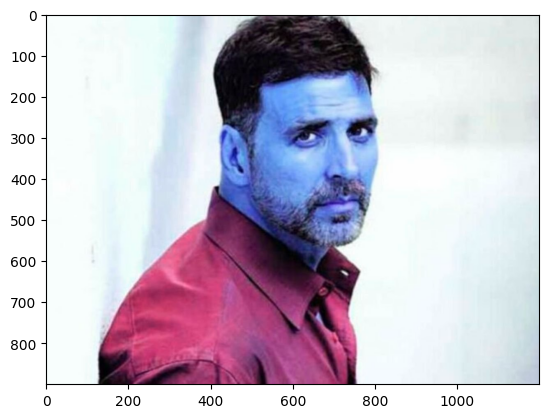

In [29]:
plt.imshow(img)

In [30]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1200)

In [31]:
gray

array([[253, 253, 253, ..., 224, 224, 223],
       [253, 253, 253, ..., 224, 224, 223],
       [253, 253, 253, ..., 224, 224, 223],
       ...,
       [253, 253, 253, ..., 202, 201, 201],
       [253, 253, 253, ..., 202, 201, 201],
       [253, 253, 253, ..., 202, 201, 201]], dtype=uint8)

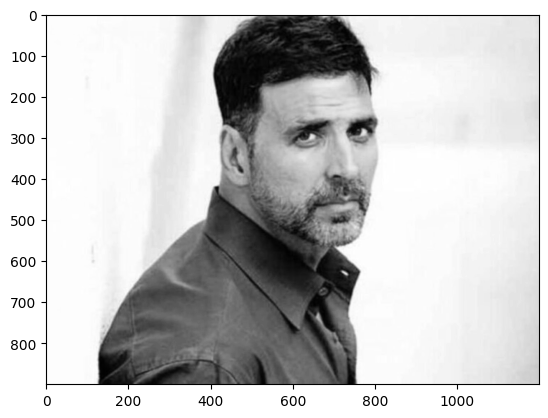

In [32]:
plt.imshow(gray,cmap='gray')

In [33]:
from cv2.data import haarcascade_frontalface_default, haarcascade_eye
face_cascade= cv2.CascadeClassifier(haarcascade_frontalface_default)
eye_cascade = cv2.CascadeClassifier(haarcascade_eye)

In [34]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[515, 136, 395, 395]])

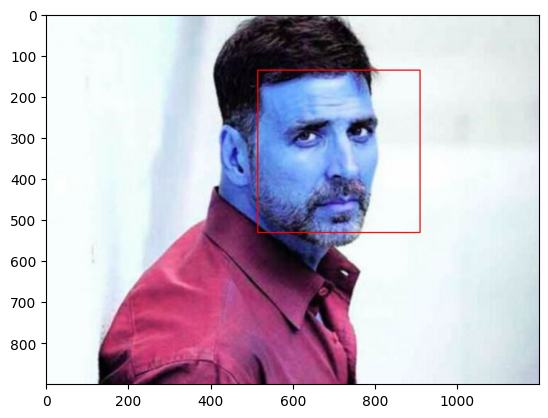

In [35]:
x,y,w,h=faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

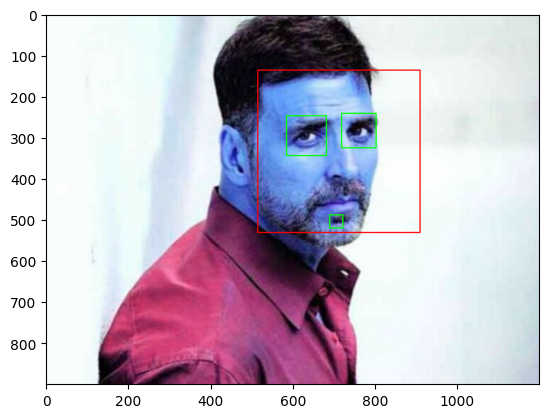

In [36]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')

In [37]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

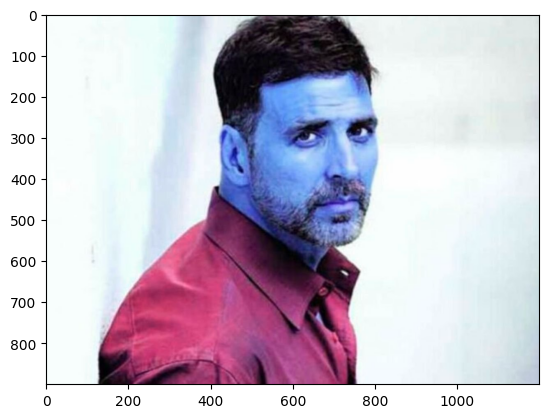

In [38]:
original_image = cv2.imread('./0d5e3950ba.jpg')
plt.imshow(original_image)

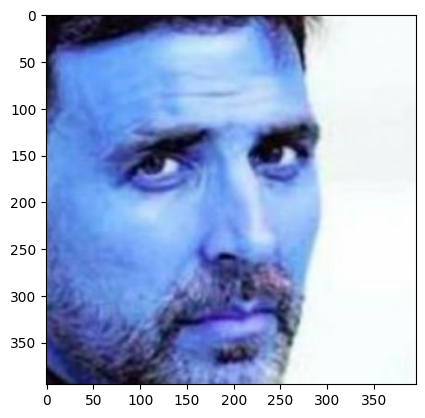

In [39]:
cropped_image = get_cropped_image_if_2_eyes('./0d5e3950ba.jpg')
plt.imshow(cropped_image)

In [40]:
import os
path_to_data = "./BollywoodActorImages/"
path_to_cr_data = "./BollywoodActorImages/cropped/"

In [41]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [42]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [43]:
img_dirs

['./BollywoodActorImages/amole_gupte',
 './BollywoodActorImages/amrish_puri',
 './BollywoodActorImages/anil_kapoor',
 './BollywoodActorImages/boman_irani',
 './BollywoodActorImages/chiranjeevi',
 './BollywoodActorImages/darsheel_safary',
 './BollywoodActorImages/farida_jalal',
 './BollywoodActorImages/hrithik_roshan',
 './BollywoodActorImages/huma_qureshi',
 './BollywoodActorImages/kader_khan',
 './BollywoodActorImages/kulbhushan_kharbanda',
 './BollywoodActorImages/mammootty',
 './BollywoodActorImages/manoj_pahwa',
 './BollywoodActorImages/mehmood',
 './BollywoodActorImages/mohanlal',
 './BollywoodActorImages/naseeruddin_shah',
 './BollywoodActorImages/navin_nischol',
 './BollywoodActorImages/nawazuddin_siddiqui',
 './BollywoodActorImages/neeraj_kabi',
 './BollywoodActorImages/pawan_malhotra',
 './BollywoodActorImages/prabhas',
 './BollywoodActorImages/prabhu_deva',
 './BollywoodActorImages/pran',
 './BollywoodActorImages/ranbir_kapoor',
 './BollywoodActorImages/sanjay_dutt',
 './Boll

In [44]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

amole_gupte
Generating cropped images in folder:  ./BollywoodActorImages/cropped/amole_gupte
amrish_puri
Generating cropped images in folder:  ./BollywoodActorImages/cropped/amrish_puri
anil_kapoor
Generating cropped images in folder:  ./BollywoodActorImages/cropped/anil_kapoor
boman_irani
Generating cropped images in folder:  ./BollywoodActorImages/cropped/boman_irani
chiranjeevi
Generating cropped images in folder:  ./BollywoodActorImages/cropped/chiranjeevi
darsheel_safary
Generating cropped images in folder:  ./BollywoodActorImages/cropped/darsheel_safary
farida_jalal
Generating cropped images in folder:  ./BollywoodActorImages/cropped/farida_jalal
hrithik_roshan
Generating cropped images in folder:  ./BollywoodActorImages/cropped/hrithik_roshan
huma_qureshi
Generating cropped images in folder:  ./BollywoodActorImages/cropped/huma_qureshi
kader_khan
Generating cropped images in folder:  ./BollywoodActorImages/cropped/kader_khan
kulbhushan_kharbanda
Generating cropped images in fold

In [45]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

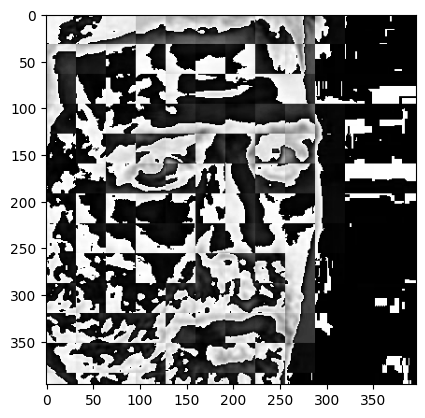

In [46]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [47]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'amole_gupte': 0,
 'amrish_puri': 1,
 'anil_kapoor': 2,
 'boman_irani': 3,
 'chiranjeevi': 4,
 'darsheel_safary': 5,
 'farida_jalal': 6,
 'hrithik_roshan': 7,
 'huma_qureshi': 8,
 'kader_khan': 9,
 'kulbhushan_kharbanda': 10,
 'mammootty': 11,
 'manoj_pahwa': 12,
 'mehmood': 13,
 'mohanlal': 14,
 'naseeruddin_shah': 15,
 'navin_nischol': 16,
 'nawazuddin_siddiqui': 17,
 'neeraj_kabi': 18,
 'pawan_malhotra': 19,
 'prabhas': 20,
 'prabhu_deva': 21,
 'pran': 22,
 'ranbir_kapoor': 23,
 'sanjay_dutt': 24,
 'sanjay_mishra': 25,
 'sharman_joshi': 26,
 'shashi_kapoor': 27,
 'shreyas_talpade': 28,
 'smita_patil': 29,
 'sunny_deol': 30,
 'vinod_khanna': 31,
 'zeenat_aman': 32}

In [48]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(767, 4096)

In [50]:
X[0]

array([ 17.,  13.,  38., ..., 219., 243., 165.])

In [51]:
X[0]

array([ 17.,  13.,  38., ..., 219., 243., 165.])

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4791666666666667

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.17      0.20      0.18         5
           2       0.00      0.00      0.00         6
           3       0.40      0.29      0.33         7
           4       0.38      0.75      0.50         4
           5       0.00      0.00      0.00         3
           6       0.40      0.86      0.55         7
           7       0.50      0.60      0.55         5
           8       0.71      0.62      0.67         8
           9       1.00      0.75      0.86         4
          10       0.00      0.00      0.00         5
          11       1.00      0.20      0.33         5
          12       0.67      0.50      0.57         8
          13       0.80      0.67      0.73         6
          14       0.83      0.62      0.71         8
          15       0.00      0.00      0.00         4
          16       0.40      0.50      0.44         8
          17       0.11    

c:\Users\hranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.460870,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.226087,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.506087,{'logisticregression__C': 1}


In [57]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [58]:
best_estimators['svm'].score(X_test,y_test)

0.515625

In [59]:
best_estimators['random_forest'].score(X_test,y_test)


0.2552083333333333

In [60]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.515625

In [62]:
best_clf = best_estimators['logistic_regression']

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

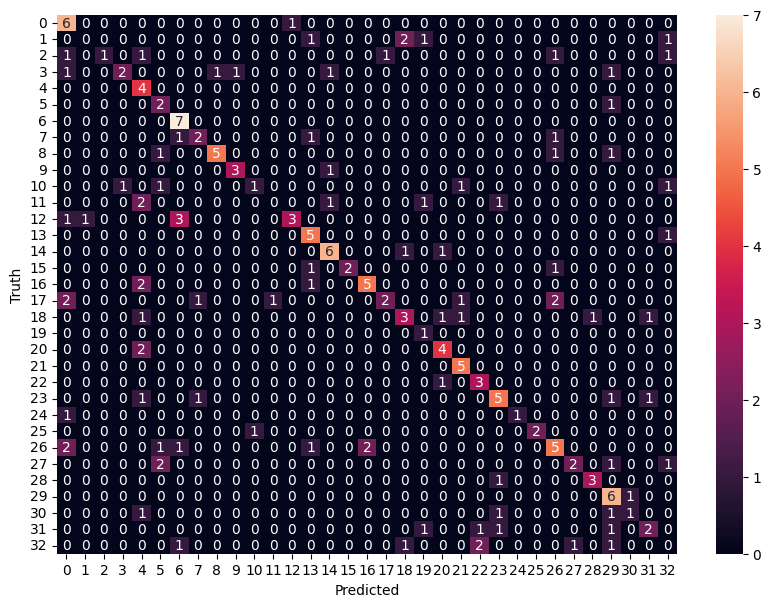

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
class_dict

{'amole_gupte': 0,
 'amrish_puri': 1,
 'anil_kapoor': 2,
 'boman_irani': 3,
 'chiranjeevi': 4,
 'darsheel_safary': 5,
 'farida_jalal': 6,
 'hrithik_roshan': 7,
 'huma_qureshi': 8,
 'kader_khan': 9,
 'kulbhushan_kharbanda': 10,
 'mammootty': 11,
 'manoj_pahwa': 12,
 'mehmood': 13,
 'mohanlal': 14,
 'naseeruddin_shah': 15,
 'navin_nischol': 16,
 'nawazuddin_siddiqui': 17,
 'neeraj_kabi': 18,
 'pawan_malhotra': 19,
 'prabhas': 20,
 'prabhu_deva': 21,
 'pran': 22,
 'ranbir_kapoor': 23,
 'sanjay_dutt': 24,
 'sanjay_mishra': 25,
 'sharman_joshi': 26,
 'shashi_kapoor': 27,
 'shreyas_talpade': 28,
 'smita_patil': 29,
 'sunny_deol': 30,
 'vinod_khanna': 31,
 'zeenat_aman': 32}

In [66]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [67]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))